In [2]:
#importing the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # For missing value imputation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Purpose of Random Forest in the Scenario of diabetes prediction?

- classifies individuals as having diabetes or not based on various health-related features.

- Diabetes prediction is a classification problem. The model needs to learn to distinguish between individuals with and without diabetes based on the provided data.

- Random forest excels at this task.


Random Forest on Dataset with Outliers

In [3]:
#loading dataset with outliers onl
# Read Excel file into DataFrame
df_outliers = pd.read_excel('../Data_Set/new_df_outliers_only_copy_smote_resampled.xlsx')

# Display the DataFrame
df_outliers

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,0.174516,0,0,0.930849,-0.357602,-1.154539,1.806645,-0.777719,0
1,-1.018012,0,0,1.073804,-0.233789,0.206884,-0.280453,-0.777719,0
2,0.949660,0,0,1.656370,1.375782,-0.405756,-0.280453,-0.777719,1
3,-0.779506,0,0,1.006045,-0.048069,-0.746112,-0.280453,1.417943,0
4,-1.256518,0,0,0.553214,-0.357602,-1.154539,-1.553924,-0.777719,0
...,...,...,...,...,...,...,...,...,...
6163,0.449954,0,0,0.397771,-0.410728,-0.364914,-0.280453,-0.777719,0
6164,-0.874241,0,0,0.341732,-1.100480,-0.786955,-1.030285,-0.777719,0
6165,-2.108582,0,0,0.585866,-0.225281,-1.399595,-1.009532,-0.777719,0
6166,-0.640560,0,0,0.629500,-0.108843,-0.405756,-1.133316,-0.052526,0


In [16]:
#Separate features (X) and target variable (y)
X = df_outliers.drop("diabetes", axis=1)
y = df_outliers["diabetes"]

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#training set: this is the larger portion of the data (usually 80%) used to train the machine learning model. the model learns patterns and relationships from the training data 

#testing set: this is the smaller portion of the data (usually 20%) used to evaluate the model's performance. the model makes predictions on the testing data and the predictions are compared to the actual target values to evaluate the model's performance.

In [18]:
# Create the random forest model (adjust hyperparameters if needed)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [20]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [21]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9846029173419774
Precision: 0.9967213114754099
Recall: 0.9728
F1-score: 0.9846153846153847


[Text(0.72216796875, 0.9761904761904762, 'x[5] <= 0.343\ngini = 0.5\nsamples = 3114\nvalue = [2456, 2478]'),
 Text(0.7138346354166667, 0.9285714285714286, 'x[4] <= 0.076\ngini = 0.388\nsamples = 2104\nvalue = [2456, 877]'),
 Text(0.7055013020833333, 0.8809523809523809, 'x[1] <= 0.5\ngini = 0.092\nsamples = 1632\nvalue = [2456, 125]'),
 Text(0.5828776041666667, 0.8333333333333334, 'x[5] <= -0.978\ngini = 0.072\nsamples = 1542\nvalue = [2334, 90]'),
 Text(0.5745442708333334, 0.7857142857142857, 'gini = 0.0\nsamples = 429\nvalue = [671, 0]'),
 Text(0.5912109375, 0.7857142857142857, 'x[2] <= 0.5\ngini = 0.097\nsamples = 1113\nvalue = [1663, 90]'),
 Text(0.457421875, 0.7380952380952381, 'x[6] <= -0.279\ngini = 0.092\nsamples = 1099\nvalue = [1649, 84]'),
 Text(0.2955729166666667, 0.6904761904761905, 'x[4] <= -0.547\ngini = 0.127\nsamples = 566\nvalue = [823.0, 60.0]'),
 Text(0.2872395833333333, 0.6428571428571429, 'gini = 0.0\nsamples = 262\nvalue = [412, 0]'),
 Text(0.30390625, 0.642857142

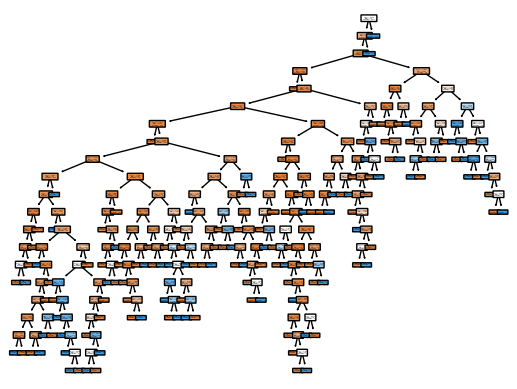

In [22]:
from sklearn.tree import plot_tree

# Choose a tree from the forest (e.g., the first tree)
tree = model.estimators_[0]

# Plot the tree
plot_tree(tree, filled=True, rounded=True)


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Get feature importance scores
importances = model.feature_importances_


In [49]:
importances

array([0.07539346, 0.01356356, 0.00998059, 0.37139142, 0.24823698,
       0.23194871, 0.01054809, 0.03893719])

In [50]:
# Assuming your dataframe is called 'df'
feature_names = X.columns.tolist()  # Extract feature names as a list

feature_names

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'smoking_history_encoded',
 'gender_encoded']

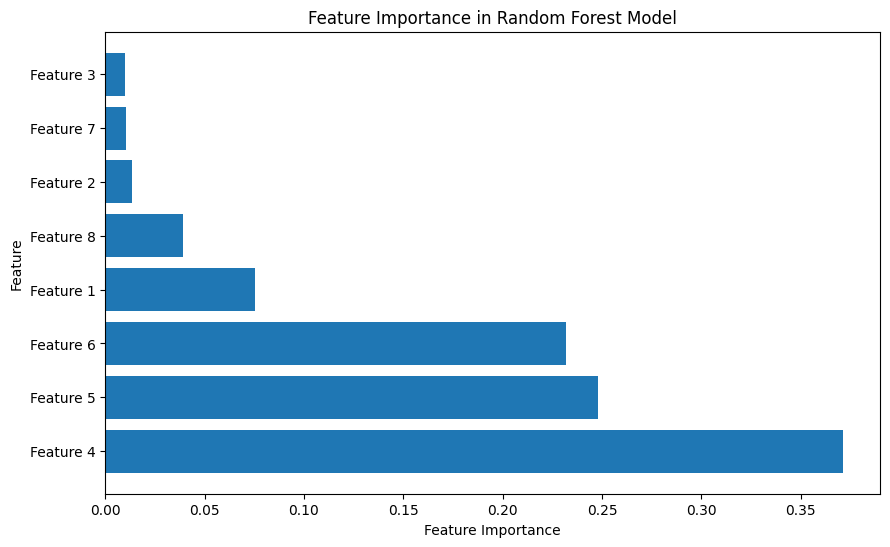

In [52]:
# Sort features and importance scores together by importance (descending)
sorted_idx = importances.argsort()[::-1]
features_sorted = ["Feature " + str(i + 1) for i in sorted_idx]
importances_sorted = importances[sorted_idx]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importances_sorted)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()